In [ ]:
from inference import predict, parse, visualize
from transformers import AutoTokenizer, AutoModelForTokenClassification

## Model, tokenizer

In [ ]:
model = AutoModelForTokenClassification.from_pretrained("Gepe55o/mountain-ner-bert-base")
tokenizer = AutoTokenizer.from_pretrained("Gepe55o/mountain-ner-bert-base")

## Texts

In [ ]:
texts = [
    "The majestic Everest stands tall against the sky",
    "Climbers dream of conquering Kilimanjaro one day",
    "Climbers dream of conquering mountain Kilimanjaro one day",
    "Climbers dream of conquering Mountain Kilimanjaro one day",
    "Climbers dream of conquering mount Kilimanjaro one day",
    "Climbers dream of conquering Mount Kilimanjaro one day",
    
    "The legends say Olympus was home to gods",
    "There's a cafe called Mont Blanc down the street",
    "My favourite dog Kilimanjaro runs very fast",
    "Do you hear about the new mountaion theme restaurant Alps ?",
    
    "Hoverla , Pip Ivan and Petros are the highest peaks of the Carpathians",
    "hoverla , pip ivan and petros are the highest peaks of the carpathians",
    "When I was child, I dreamt about climbing my own mountain Koridoro",
    
    "The Grossglockner - Hochalpenstrasse is a famous road",
    "Aoraki/Mount Cook is New Zealand's highest mountain",
    "Ben Nevis (Scottish Gaelic: Beinn Nibheis) attracts many tourists",
    "Beinn Nibheis attracts many tourists",
    
    "The project became his personal Everest to overcome",
    "There's a neighborhood called Rocky Mountains Estate",
    
    "While Everest is highest, K2 is considered more challenging",
    "The traverse from Eiger to Mönch to Jungfrau is legendary",
    
    "Mt Blanc (not Mont Blanc ) was written in the guide",
    "We visited mount mckinley (now officially denali )",
    
    "Many climbers dream of reaching the summit of Mount Everets .",
    "The famous Mount Kilimajaro is known for its stunning sunrise views"
    ]

## Visualization

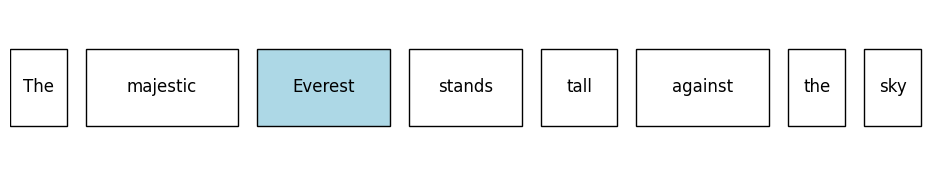

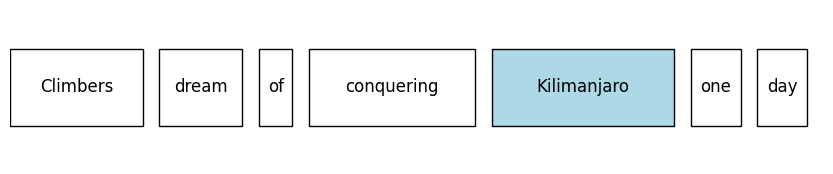

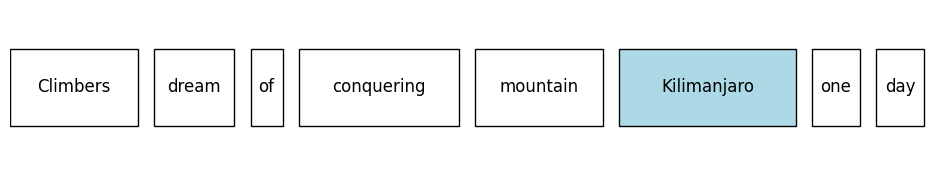

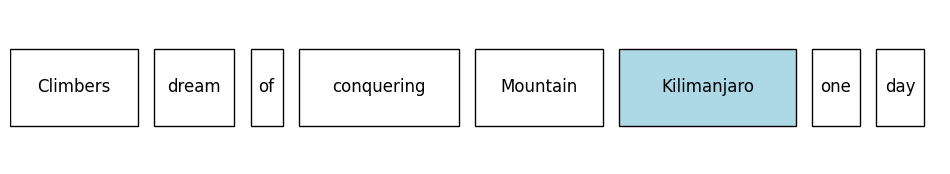

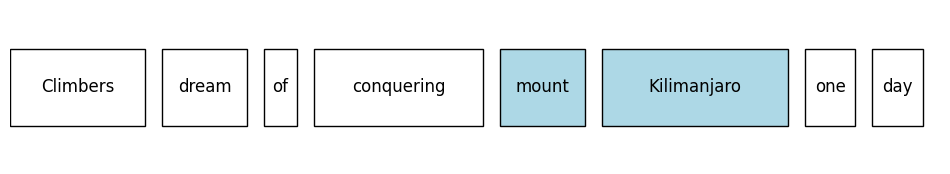

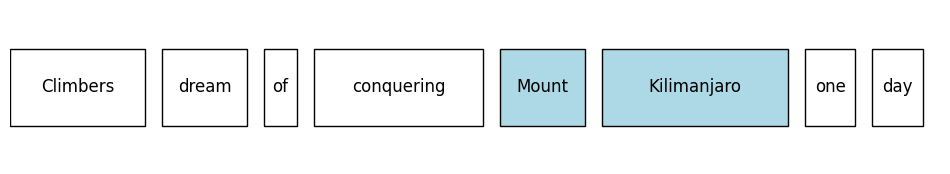

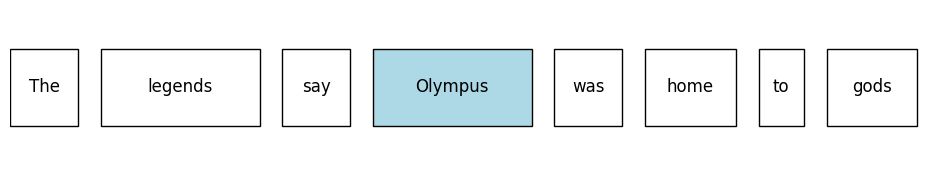

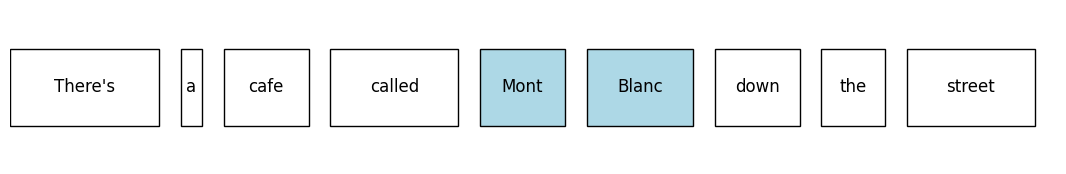

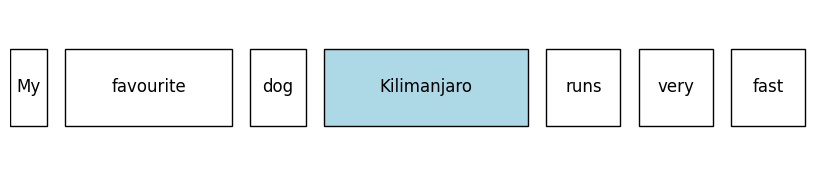

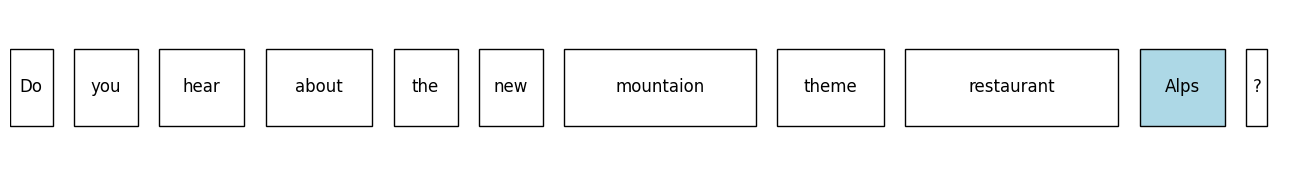

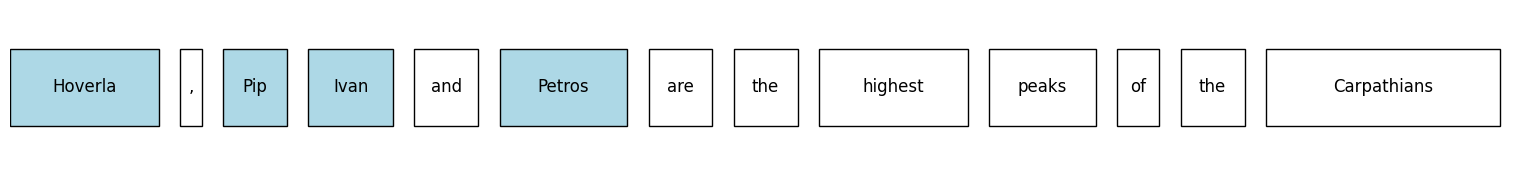

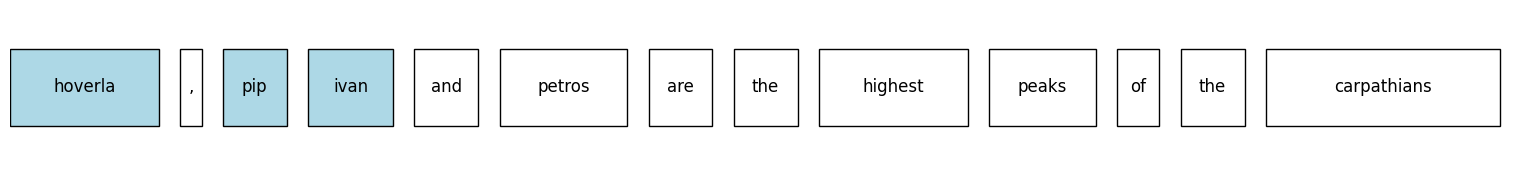

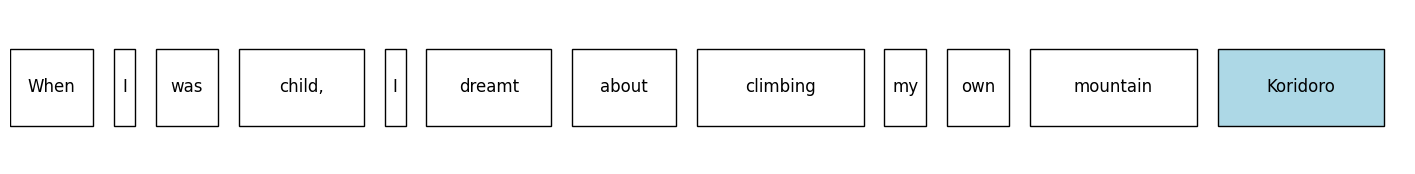

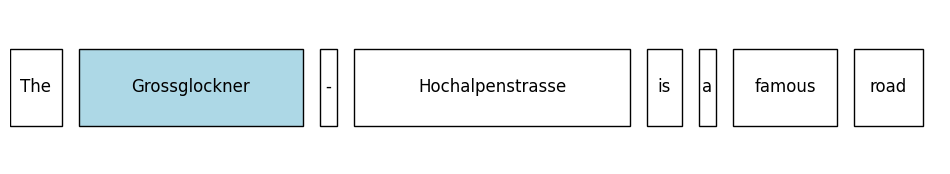

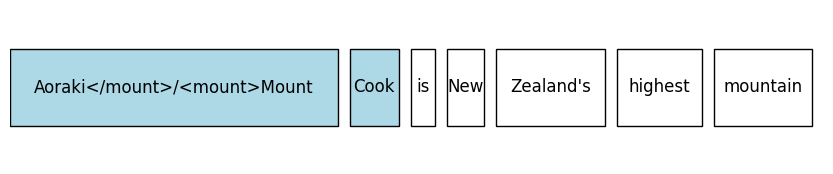

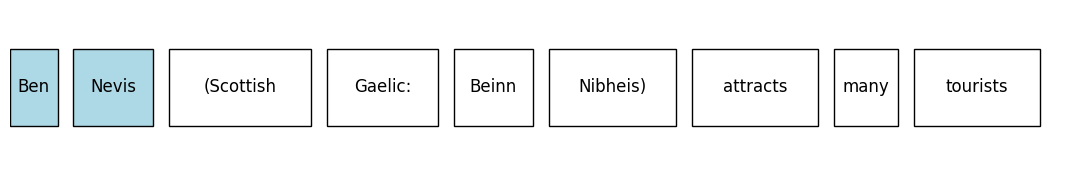

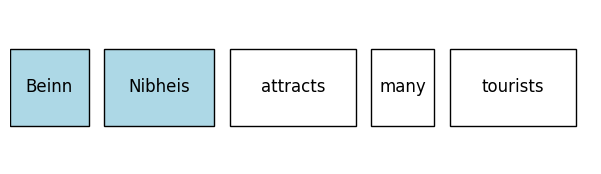

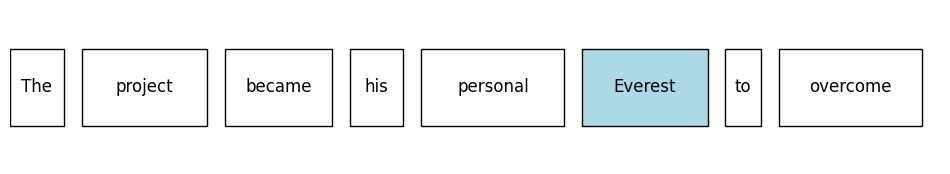

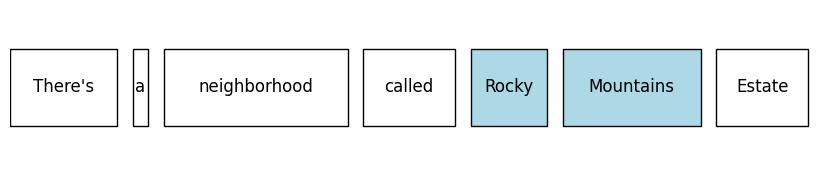

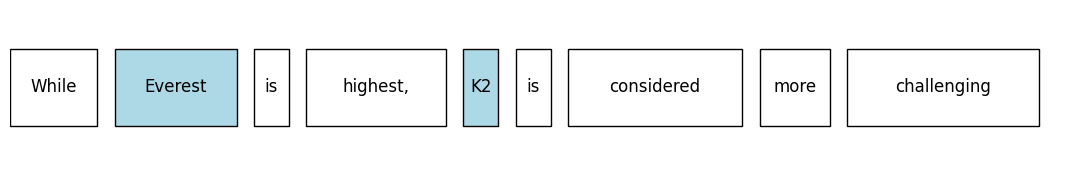

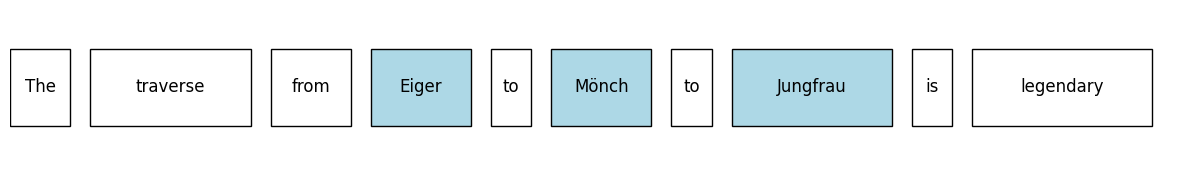

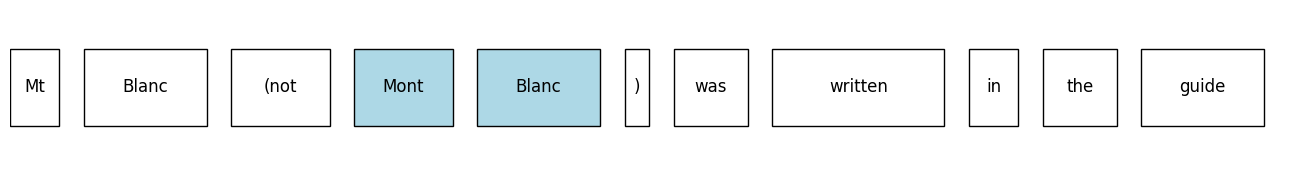

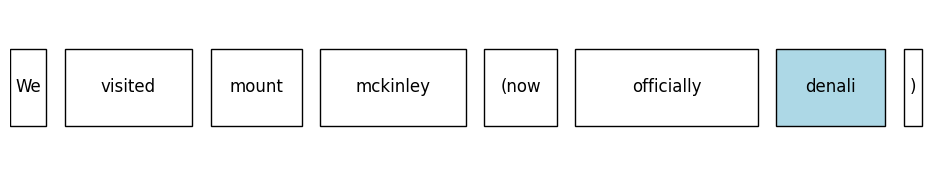

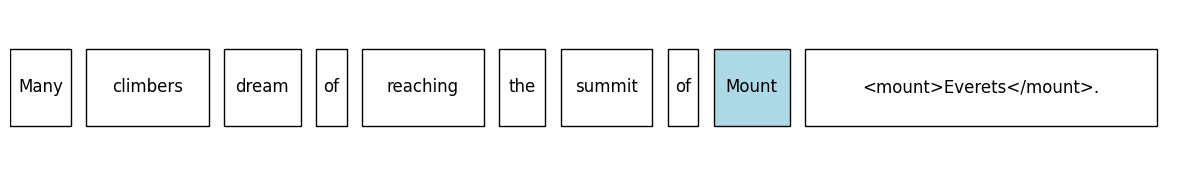

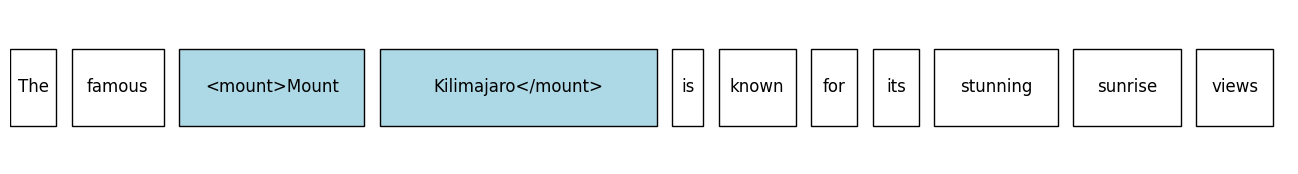

In [18]:
for text in texts:
    prediction = predict(model, tokenizer, text)
    parsed_output = parse(prediction, text)
    visualize(parsed_output)
    

## Raw text

In [ ]:
for text in texts:
    prediction = predict(model, tokenizer, text)
    print(f"Parsed Output: {parse(prediction,text)}\n")

Parsed Output: The majestic <mount>Everest</mount> stands tall against the sky

Parsed Output: Climbers dream of conquering <mount>Kilimanjaro</mount> one day

Parsed Output: Climbers dream of conquering mountain <mount>Kilimanjaro</mount> one day

Parsed Output: Climbers dream of conquering Mountain <mount>Kilimanjaro</mount> one day

Parsed Output: Climbers dream of conquering <mount>mount</mount> <mount>Kilimanjaro</mount> one day

Parsed Output: Climbers dream of conquering <mount>Mount</mount> <mount>Kilimanjaro</mount> one day

Parsed Output: The legends say <mount>Olympus</mount> was home to gods

Parsed Output: There's a cafe called <mount>Mont</mount> <mount>Blanc</mount> down the street

Parsed Output: My favourite dog <mount>Kilimanjaro</mount> runs very fast

Parsed Output: Do you hear about the new mountaion theme restaurant <mount>Alps</mount> ?

Parsed Output: <mount>Hoverla</mount> , <mount>Pip</mount> <mount>Ivan</mount> and <mount>Petros</mount> are the highest peaks 

- **The majestic &lt;mount&gt;Everest&lt;/mount&gt; stands tall against the sky**<br>
- **Climbers dream of conquering &lt;mount&gt;Kilimanjaro&lt;/mount&gt; one day> one day**

Correctly identifies mountain names. The most simple and trivial example

--------------------------------------------

- **Climbers dream of conquering mountain &lt;mount&gt;Kilimanjaro&lt;/mount&gt; one day**<br>
- **Climbers dream of conquering Mountain &lt;mount&gt;Kilimanjaro&lt;/mount&gt; one day**

Correctly identifies "Kilimanjaro", misses the word "mountain". Word `mountain` cant be a part of the reference. It is not used with the mountain names.

--------------------------------------------

- **Climbers dream of conquering &lt;mount&gt;mount&lt;/mount&gt; &lt;mount&gt;Kilimanjaro&lt;/mount&gt; one day**<br>
- **Climbers dream of conquering &lt;mount&gt;Mount&lt;/mount&gt; &lt;mount&gt;Kilimanjaro&lt;/mount&gt; one day**

Similar to the previous case, correctly identifies "Kilimanjaro" and takes into account word `mount` as part of the entity. It is correct example as `mount` is used with the mountain names.

Example:
- Mount Aso.
- Mount Fuji.
- Mount Hiei.
- Mount Kōya.
- Mount Ontake.

--------------------------------------------

- **The legends say &lt;mount&gt;Olympus&lt;/mount&gt; was home to gods**

Correctly identifies "Olympus" as a mountain name. Context is preserved

--------------------------------------------

- **There's a cafe called &lt;mount&gt;Mont&lt;/mount&gt; &lt;mount&gt;Blanc&lt;/mount&gt;**<br>
- **My favourite dog &lt;mount&gt;Kilimanjaro&lt;/mount&gt; runs very fast**<br>
- **Do you hear about the new mountaion theme restaurant &lt;mount&gt;Alps&lt;/mount&gt; ?**

This example demonstrates a lack of contextual understanding. The model does not understand that "Mont Blanc" and "Alps" are not mountain names here. It is not able to understand that "Kilimanjaro" is a dog name

--------------------------------------------

- **&lt;mount&gt;Hoverla&lt;/mount&gt ; &lt;mount&gt;Pip&lt;/mount&gt; &lt;mount&gt;Ivan&lt;/mount&gt; and &lt;mount&gt;Petros&lt;/mount&gt; are the highest peaks of the Carpathians**
- **&lt;mount&gt;hoverla&lt;/mount&gt ; &lt;mount&gt;pip&lt;/mount&gt; &lt;mount&gt;ivan&lt;/mount&gt; and petros are the highest peaks of the carpathians**

Correctly identifies "Hoverla", "Pip Ivan", "Petros" as individual mountain names even in lowercase.

--------------------------------------------

- **When I was child, I dreamt about climbing my own mountain &lt;mount&gt;Koridoro&lt;/mount&gt;**

"Koridoro" is tagged as a mountain, which aligns with the structure of the sentence. The model identifies the token "Koridoro" as a potential mountain entity, showing its ability to generalize to unseen names. But it lacks the ability to differentiate between real-world mountains and imaginary ones.

--------------------------------------------

- **The &lt;mount&gt;Grossglockner&lt;/mount&gt; - Hochalpenstrasse is a famous road**

"Grossglockner" is correctly tagged as a mountain entity.The model does not mistakenly include "Hochalpenstrasse," which is part of the name of a road, not a mountain.

--------------------------------------------

- **&lt;mount&gt;Aoraki&lt;/mount&gt;/&lt;mount&gt;Mount&lt;/mount&gt; &lt;mount&gt;Cook&lt;/mount&gt; is New Zealand's highest mountain**

Correctly identifies mountain names. But it takes punctuation into account. It is not a problem, but it is worth noting.

--------------------------------------------

- **&lt;mount&gt;Ben&lt;/mount&gt; &lt;mount&gt;Nevis&lt;/mount&gt; (Scottish Gaelic: Beinn Nibheis) attracts many tourists**
- **&lt;mount&gt;Ben&lt;/mount&gt; &lt;mount&gt;Nevis&lt;/mount&gt; (Scottish Gaelic: Beinn Nibheis) attracts many tourists**

"Ben Nevis" is correctly tagged.
The Gaelic name "Beinn Nibheis" in parentheses is ignored, as it is an alternate name and not directly relevant in this context.

In second example the model is able to identify the mountain name even if that is non English name.

--------------------------------------------

- **The project became his personal &lt;mount&gt;Everest&lt;/mount&gt; to overcome**

Correctly identifies "Everest" as an entity. However, this is a metaphorical use of the term and not a literal reference to the mountain. The model lacks context understanding to differentiate between literal and metaphorical usage.

--------------------------------------------

- **There's a neighborhood called &lt;mount&gt;Rocky&lt;/mount&gt; &lt;mount&gt;Mountains&lt;/mount&gt; Estate**

The context ("neighborhood") indicates this is not referring to the actual mountains but rather a location named after them, which the model does not recognize.

--------------------------------------------

- **While &lt;mount&gt;Everest&lt;/mount> is highest, &lt;mount&gt;K2&lt;/mount> is considered more challenging**
- **The traverse from &lt;mount&gt;Eiger&lt;/mount> to &lt;mount&gt;Mönch&lt;/mount> to &lt;mount&gt;Jungfrau&lt;/mount> is legendary**

Correctly handles multiple mountain names in the same sentence.

--------------------------------------------

- **Mt Blanc (not &lt;mount&gt;Mont&lt;/mount> &lt;mount&gt;Blanc&lt;/mount> ) was written in the guide**
- **We visited mount mckinley (now officially &lt;mount&gt;denali&lt;/mount> )**

Correctly identifies real mountain names and ignores the incorrect or alternate names.

--------------------------------------------

- **Many climbers dream of reaching the summit of &lt;mount&gt;Mount&lt;/mount> &lt;mount&gt;Everets&lt;/mount&gt;**
- **The famous &lt;mount>&lt;mount>Mount&lt;/mount> &lt;mount>Kilimajaro</mount></mount> is known for its stunning sunrise views.**

There are mistakes in mountain names. It shows no sensitivity to spelling errors. It can be a problem depends on usage of model.

--------------------------------------------

# Summary

## Pros:
1. High Recognition Accuracy for Standard Cases:

    - Correctly identifies well-known mountain names such as Everest, Kilimanjaro, and Olympus in straightforward sentences.

2. Handling of Complex Names:

    - Accurately detects multi-word mountain names, such as "<mount>Grossglockner</mount>" and "<mount>Mont</mount> <mount>Blanc</mount>", despite variability in sentence structures.

3. Versatility in Lowercase Recognition:

    - Detects lowercase mentions of mountains (e.g., "<mount>hoverla</mount> , <mount>pip</mount> <mount>ivan</mount> and petros are the highest peaks").

4. Extended Context Recognition:

    - Identifies mountains mentioned alongside geographic or cultural information (e.g., "<mount>Ben</mount> <mount>Nevis</mount> (Scottish Gaelic: Beinn Nibheis) attracts many tourists").

## Cons:

1. False Positives:

    - Mislabels non-mountain terms as mountain entities (e.g., "<mount>Kilimanjaro</mount>" in "My favourite dog <mount>Kilimanjaro</mount> runs very fast").

2. Challenges with Ambiguity:

    - Misinterprets general terms as mountain names in non-geographical contexts (e.g., "The project became his personal <mount>Everest</mount> to overcome").

3. Errors Sensitivity:

    - Struggles with typos or phonetic variations (e.g., "<mount>Everets</mount>").